# T FEROOXIDANS BIOREACTOR

## 1. No Inhibition

In [79]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Physical Data
# pH = 1.8 ; T = 30 Celcius

mumax = 0.082     # 1/hour
Ks = 0.0031       # g/liter
Yxs = 0.5         # g/g
Ypx = 0.4348    # g/g, Value dari jurnal 1/2.3
Sf = 12         # g/liter
# source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1828821/#!po=50.0000

# Flowrate

def F(t):
    return 0.05

# Reaction rates

def mu(S):
    return mumax*S/(Ks + S)

def Rg(X,S):
    return mu(S)*X
    
def Rp(X,S):
    return Ypx*Rg(X,S)

# ODE

def xdot(x,t):
    X,P,S,V = x
    dX = -F(t)*X/V + Rg(X,S)
    dP = -F(t)*P/V + Rp(X,S)
    dS = F(t)*(Sf-S)/V - Rg(X,S)/Yxs # Perlu diubah sesuai jurnal
    dV = F(t)
    return [dX,dP,dS,dV]

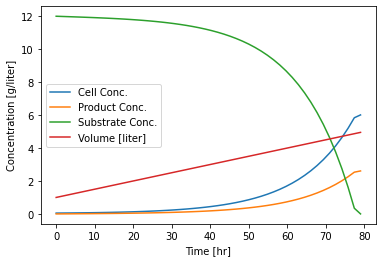

In [80]:
IC = [0.05, 0.0, 12.0, 1.0]

t = np.linspace(0,79)      # Cell concentration max, substrat minimum 79 hours
sol = odeint(xdot,IC,t)
X,P,S,V = sol.transpose()

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])

In [81]:
# View Matrix 
print(np.matrix(X))
print(np.matrix(P))
print(np.matrix(S))
print(np.matrix(V))

[[0.05       0.05280814 0.0560861  0.05985597 0.06414956 0.06900755
  0.07447928 0.08062288 0.08750562 0.0952046  0.10380751 0.11341373
  0.12413549 0.13609935 0.1494478  0.16434113 0.1809596  0.19950579
  0.22020739 0.24332026 0.26913188 0.29796531 0.33018364 0.36619496
  0.40645798 0.45148844 0.50186625 0.55824358 0.62135399 0.69202269
  0.77117819 0.85986537 0.95926024 1.07068659 1.19563484 1.33578319
  1.49302156 1.66947857 1.86755197 2.0899429  2.3396945  2.62023532
  2.93542786 3.28962273 3.6877178  4.13522022 4.63829983 5.20377254
  5.83809531 6.00988386]]
[[0.         0.00284274 0.0056646  0.00851904 0.01145303 0.01450978
  0.01773076 0.0211571  0.02483081 0.02879577 0.03309865 0.03778972
  0.04292368 0.04856053 0.05476646 0.06161477 0.06918692 0.07757368
  0.08687638 0.09720829 0.10869618 0.1214821  0.13572528 0.15160439
  0.16931999 0.18909728 0.21118929 0.23588035 0.26349014 0.2943781
  0.32894851 0.36765621 0.41101302 0.45959496 0.51405046 0.57510955
  0.64359432 0.7204306 

## 2. Competitive Inhibition by Fe3+

In [86]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Physical Data
# pH = 1.8 ; T = 30 Celcius

mumax = 1.25     # 1/hour
Ks = 0.048       # g/liter
Kp = 0.06       # g/liter
Yxs = 0.5         # g/g, assumption
Ypx = 0.4348       # g/g, assumption
Sf = 12         # g/liter
# source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1828821/#!po=50.0000

# Flowrate

def F(t):
    return 0.05

# Reaction rates

def mu(S):
    return mumax*S/(Ks*(1+((Sf-S)/Kp) + S))

def Rg(X,S):
    return mu(S)*X
    
def Rp(X,S):
    return Ypx*Rg(X,S)

# ODE

def xdot(x,t):
    X,P,S,V = x
    dX = -F(t)*X/V + Rg(X,S)
    dP = -F(t)*P/V + Rp(X,S)
    dS = F(t)*(Sf-S)/V - Rg(X,S)/Yxs # Perlu diubah sesuai jurnal
    dV = F(t)
    return [dX,dP,dS,dV]

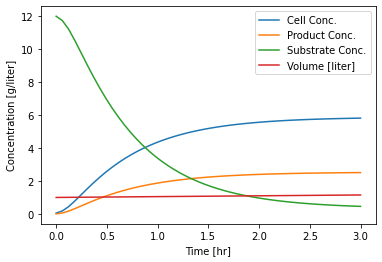

In [87]:
IC = [0.05, 0.0, 12.0, 1.0]

t = np.linspace(0,3)      # Cell concentration max, substrat minimum
sol = odeint(xdot,IC,t)
X,P,S,V = sol.transpose()

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])

In [88]:
print(np.matrix(X))
print(np.matrix(P))
print(np.matrix(S))
print(np.matrix(V))

[[0.05       0.18199923 0.44140795 0.78293018 1.15423282 1.52614793
  1.88465654 2.22331627 2.53946783 2.8324136  3.10250242 3.35064368
  3.57803689 3.78601556 3.97595522 4.1492185  4.30712277 4.45092154
  4.58179463 4.70084385 4.80909231 4.90748583 4.99689588 5.07812326
  5.1519023  5.21890517 5.2797463  5.33498665 5.38513789 5.43066631
  5.47199658 5.5095152  5.54357377 5.57449198 5.60256042 5.6280431
  5.65117986 5.67218848 5.69126671 5.70859402 5.72433333 5.73863246
  5.75162552 5.76343419 5.77416884 5.78392957 5.79280719 5.80088404
  5.80823478 5.81492713]]
[[0.         0.05745961 0.17031647 0.31887588 0.48038342 0.64215686
  0.79810077 0.945414   1.0829403  1.21037633 1.3278738  1.43582809
  1.53476075 1.62525162 1.70789875 1.78329464 1.85201208 1.91459609
  1.97155966 2.02338187 2.07050757 2.11334799 2.15228207 2.18765798
  2.21979503 2.24898547 2.27549645 2.29957189 2.32143427 2.34128633
  2.35931271 2.37568148 2.3905455  2.40404379 2.4163027  2.42743701
  2.43755102 2.44673941

## 3. Non Competitive Inhibition by Fe3+

In [89]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Physical Data
# pH = 1.8 ; T = 30 Celcius

mumax = 1.33     # 1/hour
Ks = 0.04       # g/liter
Kp = 0.06       # g/liter
Yxs = 0.5         # g/g
Ypx = 0.4348    # g/g
Sf = 12         # g/liter
# source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1828821/#!po=50.0000

# Flowrate

def F(t):
    return 0.05

# Reaction rates

def mu(S):
    return mumax*S/((Ks+S)*(1+((Sf-S)/Kp)))
    # Cause of the error

def Rg(X,S):
    return mu(S)*X
    
def Rp(X,S):
    return Ypx*Rg(X,S)

# ODE

def xdot(x,t):
    X,P,S,V = x
    dX = -F(t)*X/V + Rg(X,S)
    dP = -F(t)*P/V + Rp(X,S)
    dS = F(t)*(Sf-S)/V - Rg(X,S)/Yxs # Perlu diubah sesuai jurnal
    dV = F(t)
    return [dX,dP,dS,dV]

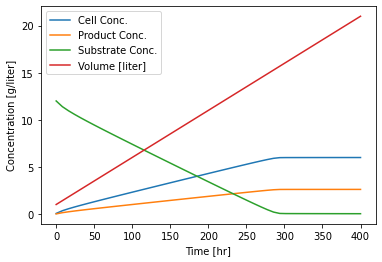

In [90]:
IC = [0.05, 0.0, 12.0, 1.0]

t = np.linspace(0,400)      # Cell concentration max, substrat minimum at 300 hours
sol = odeint(xdot,IC,t)
X,P,S,V = sol.transpose()

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])

In [91]:
print(np.matrix(X))
print(np.matrix(P))
print(np.matrix(S))
print(np.matrix(V))

[[0.05       0.33865448 0.55151411 0.7427362  0.92357192 1.09859851
  1.27005574 1.43916835 1.60665991 1.77298326 1.93843463 2.10321467
  2.26746298 2.43127858 2.59473263 2.75787647 2.92074688 3.08336951
  3.24576112 3.40793105 3.56988197 3.73161019 3.89310541 4.05435001
  4.21531758 4.37597055 4.53625649 4.69610178 4.85540171 5.01400266
  5.17167002 5.32802384 5.48239664 5.63346842 5.77810402 5.90623917
  5.97801846 5.98525978 5.98608841 5.98676174 5.98737437 5.98793467
  5.988449   5.98892271 5.98936037 5.98976589 5.99014263 5.9904935
  5.99082104 5.99112747]]
[[0.         0.13180842 0.22782912 0.31316867 0.39331124 0.47052123
  0.54591692 0.6201141  0.69347879 0.76624133 0.83855322 0.91051767
  0.98220688 1.05367248 1.12495187 1.19607237 1.26705386 1.33791061
  1.40865239 1.4792853  1.54981217 1.62023277 1.69054379 1.76073854
  1.83080636 1.90073163 1.97049216 2.04005646 2.10937947 2.17839478
  2.24700074 2.31503245 2.38219997 2.44792959 2.51085837 2.56661055
  2.59785717 2.60104082